# Kunskapskontroll 2 - Maskininlärning

## Importerar bibliotek

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import gzip
import cv2

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

## Loading MNIST dataset, normalizing "data"

In [3]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
X = mnist["data"]
y = mnist["target"].astype(np.uint8)

In [9]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

## EDA

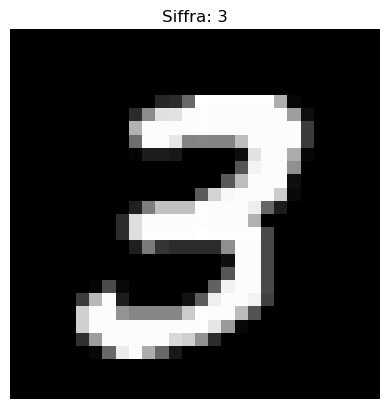

In [8]:
index = 7
image = X[index].reshape(28, 28)  

plt.imshow(image, cmap="gray", vmin=0, vmax=255) 
plt.title(f"Siffra: {y[index]}")
plt.axis("off")  
plt.show()

## Dividing data into train & test

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(56000, 784) (14000, 784)


## Instantiating models

In [25]:
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial', n_jobs=-1)

## Training models with Cross-validation

In [26]:
rf_scores = cross_val_score(clf_rf, X_train, y_train, cv=5, scoring='accuracy')
log_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

c:\Users\zezorn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\zezorn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\zezorn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\zezorn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

## Printing scores

In [27]:
print(f'Random Forest Score: {rf_scores.mean()}')
print(f'Logistic Regression Score: {log_scores.mean()}')

Random Forest Score: 0.9670714285714286
Logistic Regression Score: 0.9097142857142858


## Continuing with Random Forest

Increasing n_estimators resulted in marginally better results but doubling filesize.
Keeping n_estimators at 100 for reduced filesize

In [28]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [40, 45, 50],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best Params: {grid_search.best_params_}')

best_model = grid_search.best_estimator_

Best Params: {'max_depth': 40, 'min_samples_split': 2, 'n_estimators': 100}


## Re-fitting with the optimized model

In [29]:
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=40, random_state=42)

## Checking accuracy on test data

In [30]:
test_accuracy = best_model.score(X_test, y_test) * 100
print(f'Accuracy Score: {test_accuracy:.2f}')

Accuracy Score: 96.74


## Saving model

In [ ]:
joblib.dump(best_model, "best_model_RF.pkl", compress=5)

['RF_model.pkl']